## Income Prediction

importing required libraries and exploration of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inc_traindata = pd.read_csv('C:/Users/Lenovo/Downloads/Train.csv')

In [3]:
inc_testdata = pd.read_csv('C:/Users/Lenovo/Downloads/Test.csv')

In [4]:
inc_traindata.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [5]:
inc_traindata.shape

(209499, 43)

In [6]:
inc_testdata.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


checking for missing values

In [7]:
# inc_traindata.info()
inc_traindata.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

Dropping the null values

In [8]:
inc_traindata.dropna(axis=1, inplace=True)

In [9]:
inc_traindata.shape

(209499, 29)

In [10]:
# inc_traindata

In [11]:
# inc_testdata.info()
inc_testdata.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
education_institute               84170
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               87106
employment_stat                       0
wage_per_hour                         0
is_labor_union                    81322
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   64972
veterans_admin_questionnaire      88859
vet_benefit                           0


In [12]:
inc_testdata.dropna(axis=1, inplace=True)

In [13]:
# inc_testdata.isnull().sum()
inc_testdata.shape

(89786, 28)

In [14]:
inc_testdata['education'].mode()

0     High school graduate
Name: education, dtype: object

In [15]:
inc_testdata.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,...,Joint both under 65,0,0,0,Native,94,US,US,US,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,...,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Full-time schedules,1,0,...,Joint both under 65,15024,0,500,Native,95,US,US,US,4898.55
3,ID_TZ209502,16,Female,9th grade,Never married,White,All other,Children or Armed Forces,0,0,...,Single,0,0,0,Native,94,US,US,US,1391.44
4,ID_TZ209503,16,Male,9th grade,Never married,White,All other,Not in labor force,0,0,...,Nonfiler,0,0,0,Native,95,US,US,US,1933.18


In [16]:
inc_traindata.columns

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

Dropping the columns not necessary for the prediction purpose

In [17]:
# inc_traindata.head()
rem_cols = ['ID', 'mig_year','race',
 'is_hispanic','industry_code_main',]

Describing the mean, count, minimum, maximum, standard deviation, etc, about the dataset columns 

In [18]:
inc_testdata.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000
mean,34.586294,0.175762,54.338627,23.223932,15.377130,11.298432,1.956419,1.517998,421.977925,36.772648,198.926191,94.500590,1738.264342
std,22.345868,0.554491,265.197545,24.418207,18.062988,14.444703,2.364178,0.849330,4610.515599,268.401257,1893.916856,0.500002,990.837295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,42.820000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1059.115000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,95.000000,1617.345000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2193.735000
max,90.000000,2.000000,9400.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,12960.200000


In [19]:
inc_testdata.drop(rem_cols, axis=1, inplace=True)

In [20]:
# inc_testdata.head()
# inc_testdata.shape

In [21]:
cc= inc_testdata.corr()

In [22]:
cc

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,importance_of_record
age,1.000000,-0.004899,0.035405,0.198683,0.149104,0.109892,0.133785,0.671716,0.049172,0.061307,0.109440,-0.004621
employment_stat,-0.004899,1.000000,0.054872,0.265115,0.253311,0.226796,0.238740,0.176603,0.015668,0.024124,-0.005288,0.017858
wage_per_hour,0.035405,0.054872,1.000000,0.197058,0.167551,0.200361,0.191148,0.114571,-0.002054,0.011581,-0.007658,0.015642
working_week_per_year,0.198683,0.265115,0.197058,1.000000,0.754718,0.653212,0.748947,0.530646,0.086380,0.100232,0.012258,0.027089
industry_code,0.149104,0.253311,0.167551,0.754718,1.000000,0.563766,0.642026,0.474756,0.071709,0.071551,0.012811,0.028219
occupation_code,0.109892,0.226796,0.200361,0.653212,0.563766,1.000000,0.514340,0.436552,0.003801,0.040880,-0.031073,0.027472
total_employed,0.133785,0.238740,0.191148,0.748947,0.642026,0.514340,1.000000,0.461596,0.065144,0.083074,0.002380,0.043226
vet_benefit,0.671716,0.176603,0.114571,0.530646,0.474756,0.436552,0.461596,1.000000,0.050957,0.075522,0.056584,0.038370
gains,0.049172,0.015668,-0.002054,0.086380,0.071709,0.003801,0.065144,0.050957,1.000000,-0.012540,0.114965,0.000307
losses,0.061307,0.024124,0.011581,0.100232,0.071551,0.040880,0.083074,0.075522,-0.012540,1.000000,0.031492,0.009909


In [23]:
inc_traindata.drop(rem_cols, axis=1, inplace=True)

In [24]:
# inc_traindata['employment_stat'].unique()
inc_traindata.shape

(209499, 24)

Plotting a Distribution Plot for Age 

C:\Users\Lenovo\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='age', ylabel='Density'>

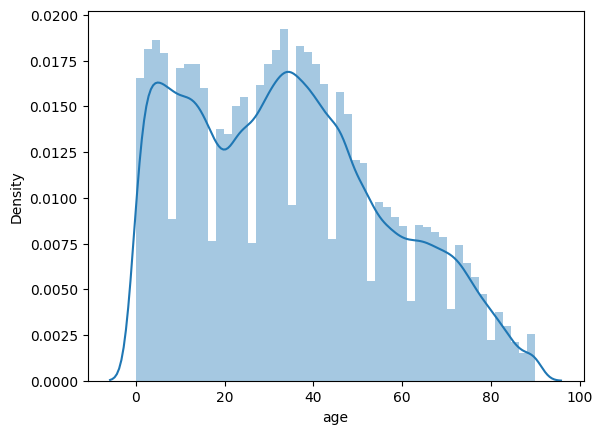

In [25]:
# inc_traindata.describe()
sns.distplot(inc_traindata['age'])

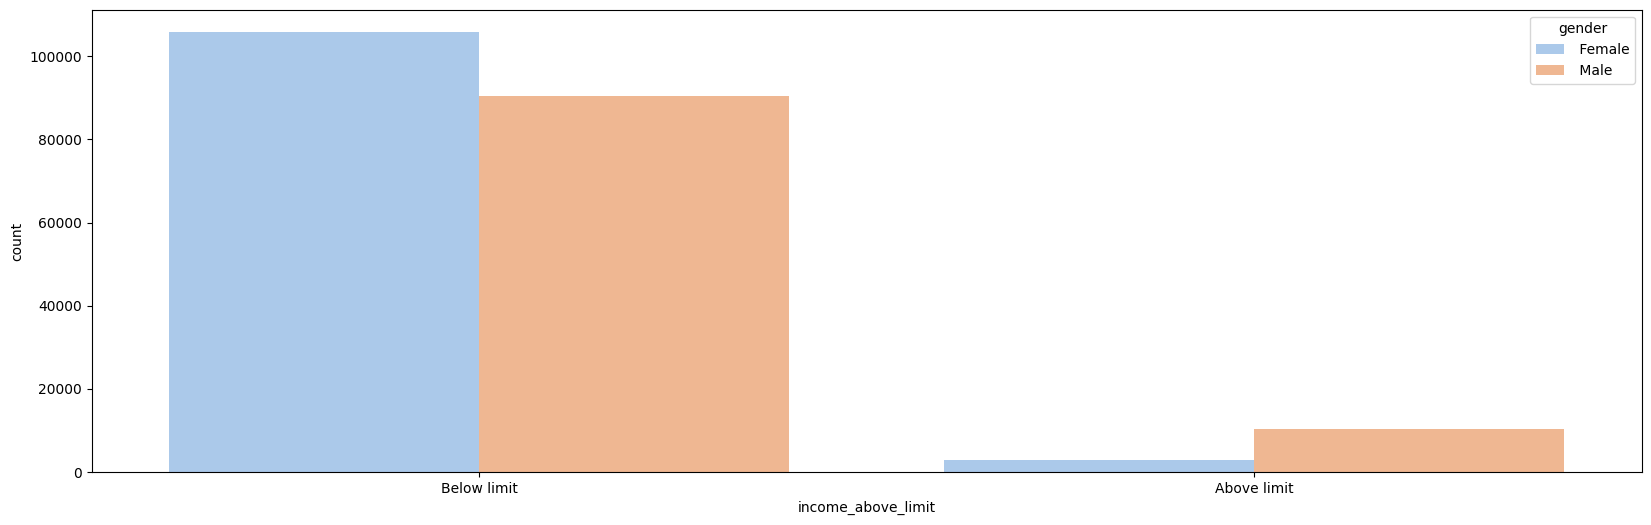

In [26]:

plt.figure(figsize=(20,6))

sns.countplot(data=inc_traindata, hue='gender', x='income_above_limit', palette='pastel')
plt.legend
plt.show()

In [27]:
pd.crosstab(index=[inc_traindata['education'],inc_traindata['gender']],
           columns=inc_traindata['income_above_limit'],
           values=inc_traindata['total_employed'],
           margins=True,
           aggfunc='count',
           margins_name='Total')

income_above_limit                               Above limit  Below limit  \
education                               gender                              
 10th grade                              Female          9.0       4199.0   
                                         Male           55.0       3642.0   
 11th grade                              Female         13.0       3848.0   
                                         Male           69.0       3330.0   
 12th grade no diploma                   Female          4.0       1113.0   
                                         Male           31.0       1134.0   
 1st 2nd 3rd or 4th grade                Female          3.0        945.0   
                                         Male           12.0        957.0   
 5th or 6th grade                        Female          4.0       1784.0   
                                         Male           26.0       1728.0   
 7th and 8th grade                       Female          7.0       4417.0   
                                         Male           65.0       3949.0   
 9th grade                               Female          9.0       3412.0   
                                         Male           35.0       3084.0   
 Associates degree-academic program      Female         94.0       2531.0   
                                         Male          319.0       1550.0   
 Associates degree-occup /vocational     Female         95.0       3179.0   
                                         Male          314.0       2062.0   
 Bachelors degree(BA AB BS)              Female        927.0       9516.0   
                                         Male         3227.0       7309.0   
 Children                                Female          NaN      24421.0   
                                         Male            NaN      25264.0   
 Doctorate degree(PhD EdD)               Female        136.0        228.0   
                                         Male          543.0        411.0   
 High school graduate                    Female        343.0      27640.0   
                                         Male         1630.0      21014.0   
 Less than 1st grade                     Female          NaN        424.0   
                                         Male            2.0        403.0   
 Masters degree(MA MS MEng MEd MSW MBA)  Female        600.0       2724.0   
                                         Male         1569.0       1968.0   
 Prof school degree (MD DDS DVM LLB JD)  Female        174.0        352.0   
                                         Male          833.0        493.0   
 Some college but no degree              Female        370.0      15263.0   
                                         Male         1480.0      12207.0   
Total                                                12998.0     196501.0   

income_above_limit                                Total  
education                               gender           
 10th grade                              Female    4208  
                                         Male      3697  
 11th grade                              Female    3861  
                                         Male      3399  
 12th grade no diploma                   Female    1117  
                                         Male      1165  
 1st 2nd 3rd or 4th grade                Female     948  
                                         Male       969  
 5th or 6th grade                        Female    1788  
                                         Male      1754  
 7th and 8th grade                       Female    4424  
                                         Male      4014  
 9th grade                               Female    3421  
                                         Male      3119  
 Associates degree-academic program      Female    2625  
                                         Male      1869  
 Associates degree-occup /vocational     Female    3274  
                                         Male   

In [28]:
# inc_traindata['household_stat'].unique()

In [29]:
# inc_traindata
# inc_traindata = pd.concat([inc_traindata.drop(df.columns, axis=1), df_clean], axis=0, ignore_index=False)

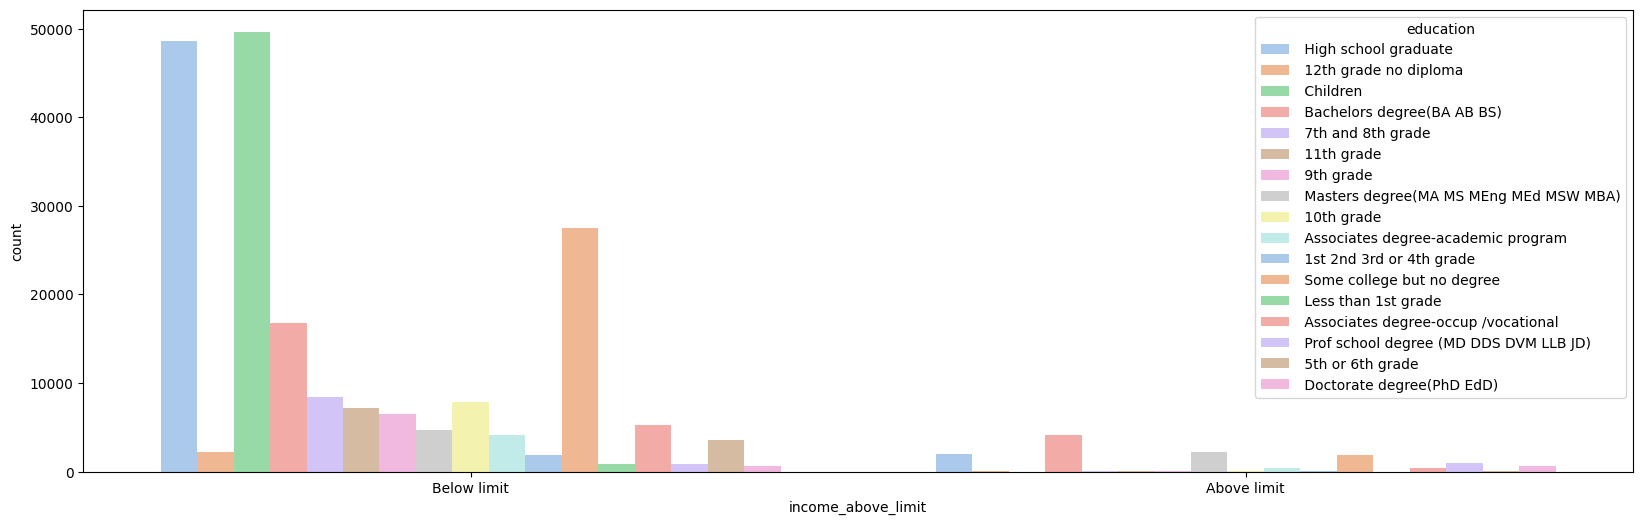

In [30]:
plt.figure(figsize=(20,6))

sns.countplot(data=inc_traindata, hue='education', x='income_above_limit', palette='pastel')
plt.legend
plt.show()

In [31]:
# plt.figure(figsize=(20,6))

# plt.scatter(data=inc_traindata, x='age',y='total_employed',color ='b')
# plt.legend
# plt.show()
# train_new.shape

In [32]:
corr=inc_traindata.corr()
corr

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,importance_of_record
age,1.000000,-0.001038,0.035477,0.204703,0.158260,0.117173,0.139649,0.674777,0.054507,0.062694,0.104979,0.000648
employment_stat,-0.001038,1.000000,0.057123,0.268320,0.255169,0.231336,0.242333,0.177809,0.014691,0.024482,-0.004663,0.014489
wage_per_hour,0.035477,0.057123,1.000000,0.194797,0.164122,0.193280,0.190484,0.111935,0.003686,0.013480,-0.006764,0.013952
working_week_per_year,0.204703,0.268320,0.194797,1.000000,0.753759,0.656590,0.746444,0.531340,0.083071,0.099906,0.014479,0.031447
industry_code,0.158260,0.255169,0.164122,0.753759,1.000000,0.563718,0.641569,0.475277,0.064050,0.071208,0.013954,0.031091
occupation_code,0.117173,0.231336,0.193280,0.656590,0.563718,1.000000,0.516841,0.438320,0.004807,0.043858,-0.025720,0.029083
total_employed,0.139649,0.242333,0.190484,0.746444,0.641569,0.516841,1.000000,0.462360,0.057171,0.082919,0.008489,0.045628
vet_benefit,0.674777,0.177809,0.111935,0.531340,0.475277,0.438320,0.462360,1.000000,0.051465,0.074768,0.054500,0.041896
gains,0.054507,0.014691,0.003686,0.083071,0.064050,0.004807,0.057171,0.051465,1.000000,-0.012662,0.129112,0.006144
losses,0.062694,0.024482,0.013480,0.099906,0.071208,0.043858,0.082919,0.074768,-0.012662,1.000000,0.047082,0.005627


<Axes: >

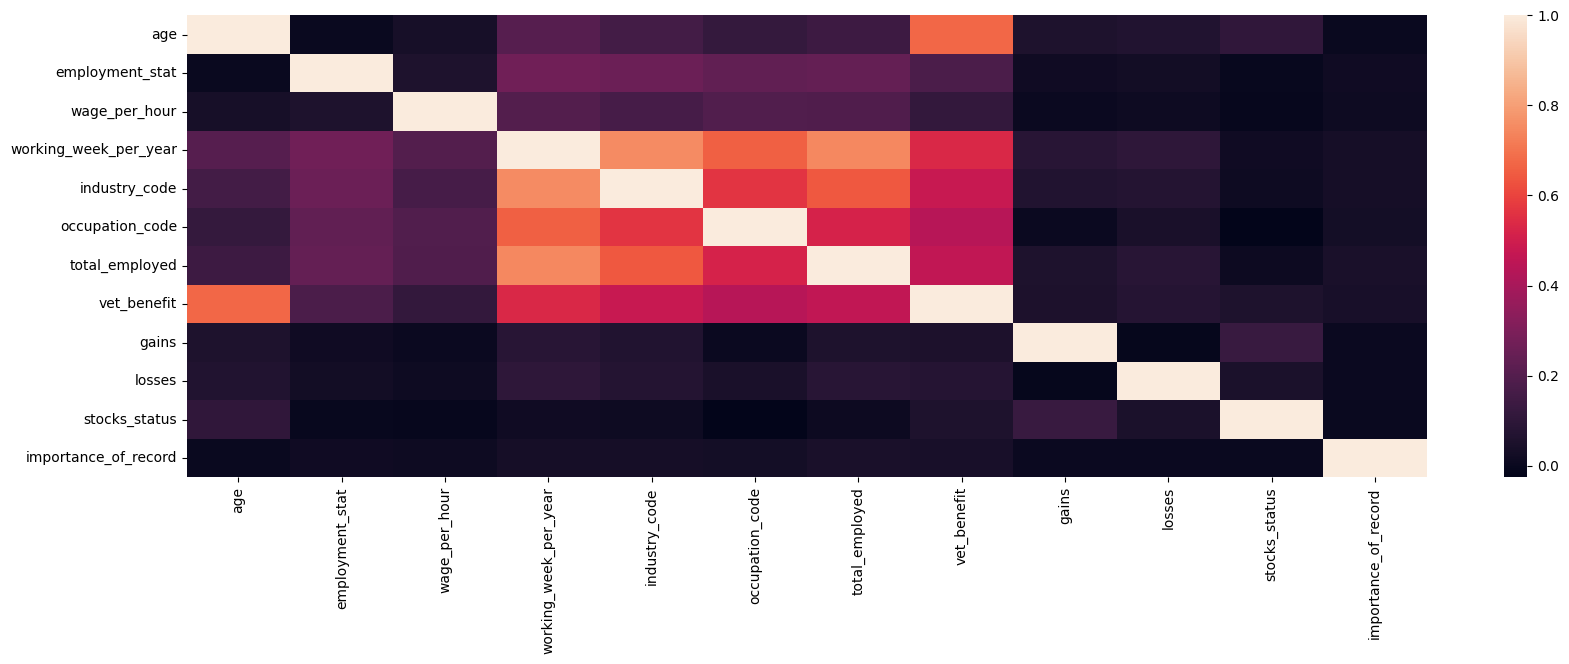

In [33]:
plt.figure(figsize=(20,6))
sns.heatmap(corr)

### Feature Engineering

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [35]:
# define the numerical features
numerical_features = ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed','gains', 'losses', 'stocks_status', 'importance_of_record']

# define the categorical features
categorical_features = ['gender', 'education', 'marital_status', 'employment_commitment', 'tax_status', 'vet_benefit','household_summary', 'household_stat',  'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother']

# define the numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

### Training the Dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# fit the pipeline to the training data
pipeline.fit(inc_traindata)

# split the dataset into training and testing sets
X = pipeline.transform(inc_traindata)
y = inc_traindata['income_above_limit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model selection and fitting
#### analysing model by metrics scores and prediction

In [38]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# Train a logistic regression model
# model = LogisticRegression(max_iter=1000, C=1, penalty='l2')
model = RandomForestClassifier(n_estimators=100, random_state = 42)

model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)*100
precision = precision_score(y_test, predictions, pos_label='Above limit')
recall = recall_score(y_test, predictions, pos_label='Above limit')
f1 = f1_score(y_test, predictions, pos_label='Above limit')

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 95.57%
Precision: 0.76
Recall: 0.43
F1 Score: 0.55


In [42]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Cross-validation score: {scores.mean():.2f}')

Cross-validation score: 0.95


In [43]:
# print(X_test)

[[-1.41297231 -0.31816462 -0.20029684 ...  0.          0.
   0.        ]
 [-1.00950582 -0.31816462 -0.20029684 ...  0.          0.
   1.        ]
 [-1.18882426 -0.31816462 -0.20029684 ...  0.          0.
   1.        ]
 ...
 [-1.05433543 -0.31816462 -0.20029684 ...  0.          0.
   1.        ]
 [ 0.64918979 -0.31816462 -0.20029684 ...  0.          0.
   1.        ]
 [ 1.27680434 -0.31816462 -0.20029684 ...  0.          0.
   1.        ]]
